<a href="https://colab.research.google.com/github/vincent0965/Colab_note/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow.keras.datasets.mnist import load_data
# ((train picture, train ans.), (test picture, tesyt ans.))
(x_train, y_train), (x_test, y_test) = load_data()

In [22]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,11,110,171,223,244,223,202,150,68,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,21,197,254,253,254,253,254,253,254,253,21,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,11,192,254,239,114,63,0,11,73,150,254,73,0,0,0,0,0,0,0


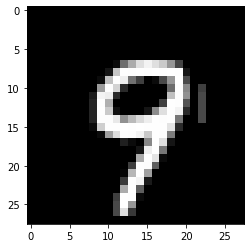

In [23]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
          # 28 * 28 = 784
          # 784 * 128 +128 = 100480
          Dense(128, activation="relu", input_dim = 784),
          # 128 * 10 = 1280 , 1280+10(bias)=1290
          Dense(10, activation="softmax")

]
model = Sequential(layers)
# param => layer 1 to layer 2 in all link and add bias number of layer 2
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# x:scaling 0-255 => 0-1 farme is random
# y:one-hot encoding 10 Ans.
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
# x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
